# King County Housing 

Business Problem: Real Estate Investment Firm 

columns to avoid according to project intro
- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat 
- long
- sqft_living15
- sqft_lot 15


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#reading in dataframe
kc_house = pd.read_csv('data/kc_house_data.csv', parse_dates=['date'])

In [3]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [5]:
#dropping columns that I don't believe are necessary
kc_house.drop(['lat', 'long', 'view', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

#sanity check
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,1955,0.0,98178
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0,1951,1991.0,98125
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0,1933,NaN,98028
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,1965,0.0,98136
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0,1987,0.0,98074


In [6]:
#defining X and y
X = kc_house.drop(columns='price')
y = kc_house['price']

In [7]:
#sanity check
print(X.shape)
X.head()

(21597, 15)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,1955,0.0,98178
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0,1951,1991.0,98125
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0,1933,NaN,98028
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,1965,0.0,98136
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0,1987,0.0,98074


In [8]:
print(y.shape)
y.head()

(21597,)


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [9]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
#creating a train df and test df
train_kch = pd.concat([X_train, y_train], axis=1)
test_kch = pd.concat([X_test, y_test], axis=1)

-----------------

## EDA King Count House - training

In [11]:
#from now on using train_kch to make model decision
#sanity check
train_kch.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
19709,4083306045,2014-10-29,5,3.75,3330,5042,2.0,NaN,Average,9 Better,2470,860.0,2014,0.0,98103,1380000.0
4800,2022059308,2015-05-05,3,2.00,1678,13862,1.0,NO,Average,7 Average,1678,0.0,1994,0.0,98030,353000.0
13225,2623039018,2014-10-27,4,1.00,1550,15239,1.5,YES,Average,6 Low Average,1370,180.0,1930,NaN,98166,685000.0
16111,8923600185,2014-08-29,3,2.50,2760,9471,1.0,NO,Average,8 Good,1760,1000.0,1956,0.0,98115,800000.0
17711,5511600315,2015-02-18,2,1.50,1400,5810,2.0,NO,Average,7 Average,1400,0.0,1940,0.0,98103,575000.0


In [12]:
train_kch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14469 entries, 19709 to 15795
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             14469 non-null  int64         
 1   date           14469 non-null  datetime64[ns]
 2   bedrooms       14469 non-null  int64         
 3   bathrooms      14469 non-null  float64       
 4   sqft_living    14469 non-null  int64         
 5   sqft_lot       14469 non-null  int64         
 6   floors         14469 non-null  float64       
 7   waterfront     12913 non-null  object        
 8   condition      14469 non-null  object        
 9   grade          14469 non-null  object        
 10  sqft_above     14469 non-null  int64         
 11  sqft_basement  14469 non-null  object        
 12  yr_built       14469 non-null  int64         
 13  yr_renovated   11883 non-null  float64       
 14  zipcode        14469 non-null  int64         
 15  price          

In [13]:
#null-value check
train_kch.isna().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1556
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2586
zipcode             0
price               0
dtype: int64

From here we can see that there is a significant missing values in the waterfront and yr_renovated columns - let's look at their specific value counts to see if we can impute any of this values

In [14]:
train_kch['waterfront'].value_counts()

NO     12812
YES      101
Name: waterfront, dtype: int64

In [15]:
train_kch['yr_renovated'].value_counts()

0.0       11390
2014.0       43
2005.0       24
2007.0       23
2003.0       22
          ...  
1974.0        1
1956.0        1
1944.0        1
1951.0        1
1946.0        1
Name: yr_renovated, Length: 66, dtype: int64

In [16]:
"""
Just a simple yes or no a categorical variable for waterfront
1156 missing out of 14469 0.07% --> can drop missing values

While yr_renovated 2586 --> 17% missing data can set it to 0
meaning that it could affect the statistical values 

Will drop yr_renovated since its too much to impute and keep 
waterfront since want to see the relationship between price and it.
"""

'\nJust a simple yes or no a categorical variable for waterfront\n1156 missing out of 14469 0.07% --> can drop missing values\n\nWhile yr_renovated 2586 --> 17% missing data can set it to 0\nmeaning that it could affect the statistical values \n\nWill drop yr_renovated since its too much to impute and keep \nwaterfront since want to see the relationship between price and it.\n'

In [17]:
#dropping yr_renovated
train_kch.drop(columns='yr_renovated', inplace=True)

In [18]:
#dropping missing values from waterfront
train_kch.dropna(subset=['waterfront'], inplace=True)

#sanity check
train_kch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12913 entries, 4800 to 15795
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             12913 non-null  int64         
 1   date           12913 non-null  datetime64[ns]
 2   bedrooms       12913 non-null  int64         
 3   bathrooms      12913 non-null  float64       
 4   sqft_living    12913 non-null  int64         
 5   sqft_lot       12913 non-null  int64         
 6   floors         12913 non-null  float64       
 7   waterfront     12913 non-null  object        
 8   condition      12913 non-null  object        
 9   grade          12913 non-null  object        
 10  sqft_above     12913 non-null  int64         
 11  sqft_basement  12913 non-null  object        
 12  yr_built       12913 non-null  int64         
 13  zipcode        12913 non-null  int64         
 14  price          12913 non-null  float64       
dtypes: datetime64[ns

Now to take a deeper look at the data. Starting with the numeric values, and to change the dtypes to to one's that make sense such as sqft_basement to int64 or float.

In [19]:
#changes the dtypes of date and sqft_basement
train_kch['sqft_basement'].value_counts()

0.0       7641
?          281
600.0      129
500.0      127
700.0      125
          ... 
1008.0       1
915.0        1
2010.0       1
1548.0       1
518.0        1
Name: sqft_basement, Length: 269, dtype: int64

Interesting find since there is a ? could this mean that there is no basement/unknown. There is already a substantial amount of a values equal to 0.0. Let's take a closer look at sqft_basement to price to see if its worth it to the model.

In [20]:
#first change question mark to 0.0 
train_kch['sqft_basement'] = train_kch['sqft_basement'].str.replace('?', '0.0')


In [21]:
train_kch['sqft_basement'].value_counts()

0.0       7922
600.0      129
500.0      127
700.0      125
400.0      116
          ... 
1008.0       1
915.0        1
2010.0       1
1548.0       1
518.0        1
Name: sqft_basement, Length: 268, dtype: int64

In [23]:
train_kch['sqft_basement'] = train_kch['sqft_basement'].astype(float)

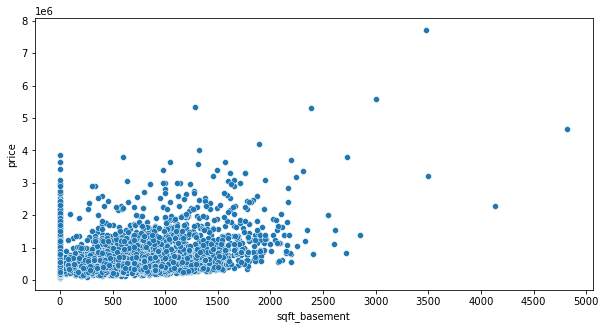

In [27]:
#make a quick plot

plt.figure(figsize=(10, 5))
sns.scatterplot(data=train_kch, x="sqft_basement", y="price")
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]);

There is not a very linear relationship between sqft_basement and price so it is not worth having this feature in the final model.

In [28]:
#Now having a look at the different features
train_kch['bedrooms'].value_counts()

3     5821
4     4147
2     1646
5      983
6      153
1      118
7       31
8        7
9        4
10       2
11       1
Name: bedrooms, dtype: int64

In [29]:
#there are some outliers here such as 8 - 11 bedrooms

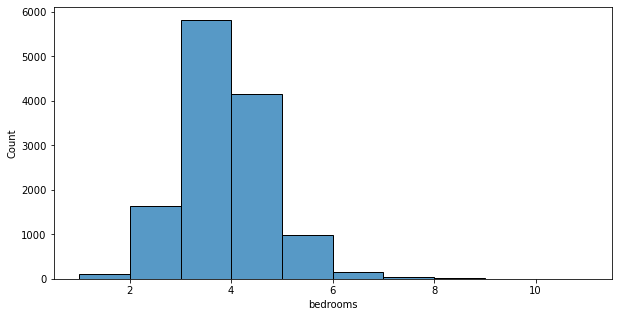

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_kch, x="bedrooms", binwidth=1);

Can have a threshold for the outliers or can just remove the values since taking away those values would give a more general idea; however since we don't have all day will look at a correlation matrix 

Instead and then go from there but will categorical variables first such as condition and grade.